# The SIR Model

## Overview

The Susceptible-Infected-Recovered (SIR) model is an infectious epidemic model that can be applied in the context of disease spreading in a population. The SIR model assumes a simple closed population (no births, deaths, migration) and simple disease (no mutations or other ways to spread). The model originates from the work of Kermack and McKendrick in their 1927 paper, _A Contribution to the Mathematical Theory of Epidemics_, where they proposed a general model for disease dynamics. The SIR model came about as a special case of their framework where transmission and recovery rates are constant.

The SIR model divides the population in three categories:
- **Susceptible** ($S$) - people who have not yet been infected
- **Infected** ($I$) - currently sick and can transmit the disease to **Susceptibles**
- **Recovered** ($R$) - individuals who have stopped being **Infected**

In [23]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Parameters
- $N$ - total population size
- $\beta$ - transmission rate, describes how likely a person is to get infected, average number of contacts per person per day
- $\gamma$ - recovery rate, the fraction of infectious individuals who recover each day. ie if a person is infectious for 4 days, $\gamma = 1/4$

We can model the dynamics using the following equations: 

$\large \frac{dS}{dt} = -\frac{\beta}{N} SI$

The rate of change of the Susceptibles is negative because the number of Susceptibles decreases over time as more people get infected.

$\large \frac{dI}{dt} = \frac{\beta}{N} SI - \gamma I$

Susceptible people become infected, so if the $\beta SI$ term is subtracted from the Susceptible population, $\beta SI$ is added to the Infected population. Then, there are also losses of Infected people when they get recovered; therefore $-\gamma I$ is subtracted.

$\large\frac{dR}{dt} = \gamma I$

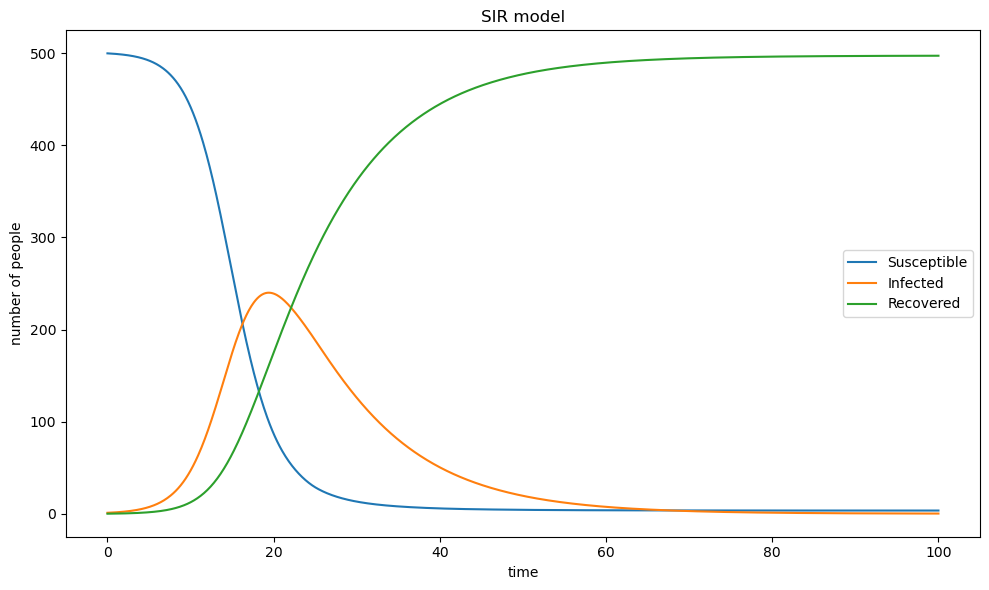

In [98]:
# params
beta = .5 # 0.001 # infection rate
gamma = .1 # 0.1 # recovery rate


# initial conditions
S0 = 500
I0 = 1
R0 = 0
initial_conditions = [S0, I0, R0]
N = sum(initial_conditions)


t_start = 0
t_end = 100
t_eval = np.linspace(t_start, t_end, 1000)

def sir_dynamics(t, y):
    S, I, R = y
    dSdt = -beta/N * S * I
    dIdt = beta/N * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

odesol = solve_ivp(sir_dynamics, [t_start, t_end], initial_conditions, t_eval=t_eval)


plt.figure(figsize=(10, 6))
plt.plot(odesol.t, odesol.y[0], label='Susceptible')
plt.plot(odesol.t, odesol.y[1], label='Infected')
plt.plot(odesol.t, odesol.y[2], label='Recovered')

plt.xlabel('time')
plt.ylabel('number of people')
plt.title('SIR model')
plt.legend()
plt.tight_layout()
plt.show()

### Analysis

The initial susceptible population starts at 500 and decreases with the passage of time. By the end, the number of susceptible people approaches zero because every person will have been infected. Likewise for the recovered population, if everyone has been infected, then recovered, the number of recovered population increases and approaches 500. When the number of susceptible people is greater than the number of recovered, $\frac{dI}{dt}$ is positive/increasing. As the number of susceptible people drops, the negative term of $\frac{dI}{dt}$ dominates, and the infected population starts decreasing as they transition to be recovered more quickly than new cases of infection.

**What happens if you double the transmission rate ($\beta$)? Or decrease the transmission rate by a half?**

Ways this might happen include social distancing, handwashing, mask-wearing, etc. As shown in figures below, doubling $\beta$ causes the majority of the population to get infected in a shorter time. Reducing $\beta$ by half spreads out the curve and drastically slows the spread of disease.

### Reproduction number, $R_0$

$\large R_0 = \frac{\beta}{\gamma}$

The possibility and severity of an outbreak depends on the ratio between $\beta$ and $\gamma$, known as $R_0$ (R-naught). $R_0$ describes the expected number of secondary infectious cases produced by a single infected person before they recover (Jones 2021). If $R_0 > 1$, the number of infected people increaseas, and an outbreak occurs. If $R_0 < 1$, the number of infected people does not increase, and there is no epidemic.

###### $R_0$ is not to be confused with the initial recovered population $R(0)$.


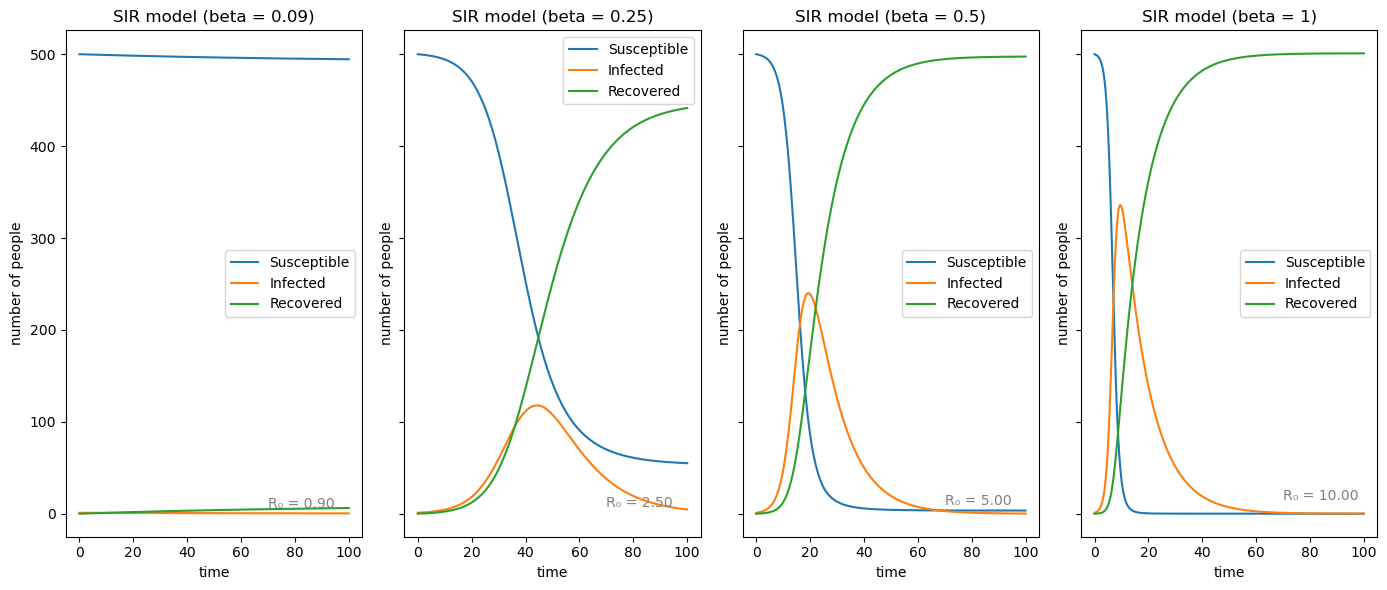

In [99]:
gamma = 0.1 # recovery rate

# Initial conditions
S0 = 500
I0 = 1
R0 = 0
initial_conditions = [S0, I0, R0]

N = sum(initial_conditions)

t_start = 0
t_end = 100
t_eval = np.linspace(t_start, t_end, 1000)

def sir_dynamics(t, y, beta):
    S, I, R = y
    dSdt = -beta/N * S * I
    dIdt = beta/N * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

beta_values = [.09 ,.25,.5, 1]

fig, axes = plt.subplots(1, len(beta_values), figsize=(14, 6), sharey=True)

for i, beta in enumerate(beta_values):
    sol = solve_ivp(lambda t, y: sir_dynamics(t, y, beta), [t_start, t_end], initial_conditions, t_eval=t_eval)

    axes[i].plot(sol.t, sol.y[0], label='Susceptible')
    axes[i].plot(sol.t, sol.y[1], label='Infected')
    axes[i].plot(sol.t, sol.y[2], label='Recovered')
    axes[i].set_title(f"SIR model (beta = {beta})")

    R0_value = beta / gamma
    axes[i].text(t_end * 0.7, R0_value + 5, f'R₀ = {R0_value:.2f}', color='gray')

    axes[i].set_xlabel('time')
    axes[i].set_ylabel('number of people')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Discussion

In the classical SIR model, infections always die out, and once-infected people are immune indefinitely. These assumptions limit its realism and application to real-world epidemics. For instance, many individuals may lose immunity over time or be reinfected with a mutated strain.  The SEIRS model addresses some of these limitations by extending the SIR model to account for latency using a new group for exposed ($E$) individuals who are infected but not yet infectious, loss of immunity by allowing recovered individuals to become susceptible again, births and deaths to reflect population turnover (Bjornstad and Shea 2020).

In future analysis, the SIR model could be extended to explore spatial models where disease spreads over localized networks or in subpopulations (Ovaskainen and Hanski 2001), or incorporating stochastic effects to account for chance events such as when exactly an individual recovers.

## References

Bjørnstad, O.N., Shea, K., Krzywinski, M. et al. 2020. The SEIRS model for infectious disease dynamics. Nat Methods 17, 557–558. https://doi.org/10.1038/s41592-020-0856-2

Jones, James H. 2021. Notes on R0. Department of Anthropological Sciences, Stanford University. https://populationsciences.berkeley.edu/wp-content/uploads/2021/06/Jones-Notes-on-R0.pdf

Kermack William Ogilvy and McKendrick A. G. 1927. A contribution to the mathematical theory of epidemics Proc. R. Soc. Lond. A115700–721 http://doi.org/10.1098/rspa.1927.0118

Ovaskainen, O., and I. Hanski. 2001. Spatially structured metapopulation models: Global and \\
\indent local assessment of metapopulation capacity. Theoretical population biology 60:281–302.